## Import required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install ultralytics

!pip install ultralytics==8.0.196

import os
from PIL import Image
import pandas as pd
import numpy as np
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [3]:
train_images = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/images'
valid_images = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/valid/images'
test_images = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/images'
train_labels = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/labels'
valid_labels = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/valid/labels'
test_labels = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/labels'
data_file = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/data.yaml'

## Model training, validation, and testing

In [5]:
# -- train using YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/data.yaml' epochs=20 batch=8 imgsz=800 plots=True optimizer=Adam lr0=0.001 max_det=500

100% 21.5M/21.5M [00:00<00:00, 47.4MB/s]
New https://pypi.org/project/ultralytics/8.1.6 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/data.yaml, epochs=20, patience=50, batch=8, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=500, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [6]:
# -- valaidate the model

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/valid/labels.cache... 207 images, 25 backgrounds, 0 corrupt: 100% 207/207 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:58<00:00,  4.48s/it]
                   all        207      12214      0.951      0.924      0.965      0.748
Speed: 1.6ms preprocess, 36.0ms inference, 0.0ms loss, 16.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [7]:
# -- save train results in drive

train_results_source = '/content/runs/detect/train/'
train_results_dest = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_results'

!cp -r /content/runs/detect/train/ /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_results/

# -- save validation results in drive

valid_results_source = '/content/runs/detect/val/'
valid_results_dest = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/valid_results'

!cp -r /content/runs/detect/val/ /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/valid_results

print('Results of train and valid are saved into "Results" folder in the drive')

Results of train and valid are saved into "Results" folder in the drive


In [8]:
# -- inference on test set

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/images save=True save_txt=True show_conf=True show_labels=False line_width=2

# -- here we also get the annotations for the test in a text file that is stored in 'runs/detect/predict'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/207 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/images/20CHens_-1-_1_jpg.rf.30e2fcd7088349fd4572257f33cd34e3.jpg: 800x800 52 Grainss, 22.6ms
image 2/207 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/images/20CHens_-1-_2_jpg.rf.4def7457b2fe35080766b047fbd552b3.jpg: 800x800 97 Grainss, 22.5ms
image 3/207 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/images/20CHens_-1-_3_jpg.rf.a674e5da4242e577046f9e8727615ed0.jpg: 800x800 45 Grainss, 22.6ms
image 4/207 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/test/images/20CHens_-1-_4_jpg.rf.3a24cf759f08b572575c236968e451f3.jpg: 800x800 39 Grainss, 22.6ms
image 5/207 /content/drive/MyDrive/Pollen_Grain_Counting_Project

In [9]:
# -- saving the annotations in a text file for train and valid images

from ultralytics import YOLO

!yolo task=detect mode=predict model=/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_results/weights/best.pt conf=0.5 source=/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/images save=True save_txt=True show_conf=True show_labels=False line_width=2
!yolo task=detect mode=predict model=/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_results/weights/best.pt conf=0.5 source=/content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/valid/images save=True save_txt=True show_conf=True show_labels=False line_width=2

# -- the annotations for the train and valid images are stored in a text file at 'runs/detect/predict2' & 'predict3'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/612 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/images/10HCels_-1-_1_jpg.rf.f156c7871ed9dcfe4d6ef1f967d9654e.jpg: 768x800 (no detections), 109.6ms
image 2/612 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/images/10HCels_-1-_2_jpg.rf.6e3feb4c2e5b7e6550309e2d5eeb6449.jpg: 768x800 (no detections), 22.2ms
image 3/612 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/images/10HCels_-1-_3_jpg.rf.3b8b16f2910219f1950a8e16728d0128.jpg: 768x800 (no detections), 22.2ms
image 4/612 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_dataset/train/images/10HCels_-1-_4_jpg.rf.f360052def630721e6de0914774039d6.jpg: 768x800 (no detections), 22.2ms
image 5/612 /content/drive/MyDrive/Pollen_Grain_Counting_Project/annotated_datase

In [10]:
# -- save results in drive

!cp -r /content/runs/detect/predict/labels /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/test_pred_labels # -- test pred labels
!cp -r /content/runs/detect/predict2/labels /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_pred_labels # -- train pred labels
!cp -r /content/runs/detect/predict3/labels /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/valid_pred_labels # -- valid pred labels

!cp -r /content/runs/detect/predict /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/test_pred_images # -- test pred images
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_pred_images # -- train pred images
!cp -r /content/runs/detect/predict3 /content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/valid_pred_images # -- valid pred images

## Find accuracy (predicted/ground_truth)

Counting the pollen grains from the actual objects as ground truth count

In [ ]:
# -- functiom for counting number of objects { (grains) (ground truths) } in test, valid and train set

import os

def count_objects(folder_path):
    object_counts_per_image = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):  # Checking for annotation files
            with open(os.path.join(folder_path, filename), 'r') as file:
                lines = file.readlines()
                object_count = len(lines)
                image_name = filename.split('.rf')[0]  # Removing the .txt extension
                object_counts_per_image[image_name] = object_count
    return object_counts_per_image

# -- adding the objects of cropped images into its main image and its name in a dictionary

def aggregate_cropped_counts(cropped_counts):
    aggregated_counts = {}
    for cropped_image_name, count in cropped_counts.items():
        parts = cropped_image_name.split('_', 1)  # Splitting only at the first underscore
        if parts[1].startswith("-1-"):
            # If the part after first underscore starts with "-1-", split again
            further_parts = parts[1].split('_', 1)
            original_image_name = parts[0] + '_' + further_parts[0]  # Using the first two parts
        else:
            original_image_name = parts[0]  # Using the part before the first underscore
        aggregated_counts[original_image_name] = aggregated_counts.get(original_image_name, 0) + count
    return aggregated_counts

def aggregate_cropped_counts(cropped_counts):
    aggregated_counts = {}
    for cropped_image_name, count in cropped_counts.items():
        parts = cropped_image_name.split('_', 1)  # Splitting only at the first underscore
        if parts[1].startswith(("-1-", "-2-")):
            # If the part after the first underscore starts with "-1-" or "-2-", split again
            further_parts = parts[1].split('_', 1)
            original_image_name = parts[0] + '_' + further_parts[0]  # Using the first two parts
        else:
            original_image_name = parts[0]  # Using the part before the first underscore
        aggregated_counts[original_image_name] = aggregated_counts.get(original_image_name, 0) + count
    return aggregated_counts


In [ ]:
# -- get the count of grains from train, valid, and test labels

train_labels_count = count_objects(train_labels)
valid_labels_count = count_objects(valid_labels)
test_labels_count = count_objects(test_labels)

print(f'Num of train cropped labels are {len(train_labels_count)}')
print(f'Num of valid cropped labels are {len(valid_labels_count)}')
print(f'Num of test cropped labels are {len(test_labels_count)}')
print()
print(f'Train images and counts: {train_labels_count}')
print(f'Valid images and counts: {valid_labels_count}')
print(f'Test images and counts: {test_labels_count}')
print()

# -- ground truths of all sets

train_gt = aggregate_cropped_counts(train_labels_count)
valid_gt = aggregate_cropped_counts(valid_labels_count)
test_gt  = aggregate_cropped_counts(test_labels_count)

print(f'Num of main images in training are {len(train_gt)}')
print(f'Num of main images in validation are {len(valid_gt)}')
print(f'Num of main images in testing are {len(test_gt)}')
print()
print(f'Train images and counts: {train_gt}')
print(f'Valid images and counts: {valid_gt}')
print(f'Test images and counts: {test_gt}')

Num of train cropped labels are 612
Num of valid cropped labels are 207
Num of test cropped labels are 207

Train images and counts: {'10HCels_-1-_2_jpg': 0, '10HCels_-1-_7_jpg': 0, '10HCels_-1-_6_jpg': 0, '10HCels_-1-_1_jpg': 1, '10HCels_1_jpg': 44, '10HCels_-1-_5_jpg': 0, '10HCels_4_jpg': 83, '10HCels_-1-_9_jpg': 0, '10HCels_-1-_3_jpg': 0, '10HCels_2_jpg': 218, '10HCels_-1-_4_jpg': 0, '10HCels_3_jpg': 19, '10HCels_-1-_8_jpg': 0, '12HCels_-1-_8_jpg': 22, '12HCels_3_jpg': 0, '11HCels_-1-_1_jpg': 1, '12HCels_1_jpg': 0, '11Aug-8_5_jpg': 112, '12HCels_-1-_7_jpg': 5, '11HCels_5_jpg': 18, '11HCels_9_jpg': 2, '11Aug-8_3_jpg': 4, '10HCels_9_jpg': 0, '11Aug-8_2_jpg': 122, '12HCels_-1-_2_jpg': 40, '12HCels_2_jpg': 0, '10HCels_7_jpg': 1, '11HCels_3_jpg': 56, '11HCels_-1-_9_jpg': 24, '11Aug-8_1_jpg': 10, '11HCels_1_jpg': 5, '12HCels_-1-_1_jpg': 0, '10HCels_5_jpg': 68, '11HCels_-1-_3_jpg': 5, '11HCels_4_jpg': 10, '10HCels_6_jpg': 23, '11HCels_2_jpg': 6, '11Aug-8_8_jpg': 45, '11Aug-8_6_jpg': 42, '1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -- converting dictionary into a dataframe

test_gt = pd.DataFrame(list(test_gt.items()), columns=['Image_Name', 'GT_Count'])
valid_gt = pd.DataFrame(list(valid_gt.items()), columns=['Image_Name', 'GT_Count'])
train_gt = pd.DataFrame(list(train_gt.items()), columns=['Image_Name', 'GT_Count'])

test_gt

,Image_Name,GT_Count
0,21CHens_-1-,529
1,20CHens_-1-,783
2,21CHens,678
3,4HHens_-1-,1
4,22CCavs_-1-,511
5,5HHens_-1-,418
6,22CCavs,603
7,5HHens,380
8,7HCavs_-1-,442
9,7HCavs,741


Counting the predicted objects as predicted count

In [ ]:
# -- get the count of grains from train, valid, and test labels

train_predicted_counts = count_objects('/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_pred_labels')
valid_predicted_counts = count_objects('/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/valid_pred_labels')
test_predicted_counts = count_objects('/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/test_pred_labels')

print(f'Num of train cropped labels are {len(train_predicted_counts)}')
print(f'Num of valid cropped labels are {len(valid_predicted_counts)}')
print(f'Num of test cropped labels are {len(test_predicted_counts)}')
print()
print(f'Train images and counts: {train_predicted_counts}')
print(f'Valid images and counts: {valid_predicted_counts}')
print(f'Test images and counts: {test_predicted_counts}')
print()

# -- predicted counts of all sets

train_pred = aggregate_cropped_counts(train_predicted_counts)
valid_pred = aggregate_cropped_counts(valid_predicted_counts)
test_pred = aggregate_cropped_counts(test_predicted_counts)

print(f'Num of main images in training are {len(train_pred)}')
print(f'Num of main images in validation are {len(valid_pred)}')
print(f'Num of main images in testing are {len(test_pred)}')
print()
print(f'Train images and counts: {train_pred}')
print(f'Valid images and counts: {valid_pred}')
print(f'Test images and counts: {test_pred}')

Num of train cropped labels are 559
Num of valid cropped labels are 183
Num of test cropped labels are 181

Train images and counts: {'10HCels_1_jpg': 45, '10HCels_2_jpg': 217, '10HCels_3_jpg': 18, '10HCels_4_jpg': 85, '10HCels_5_jpg': 70, '10HCels_6_jpg': 23, '10HCels_7_jpg': 1, '10HCels_8_jpg': 1, '11Aug-8_1_jpg': 10, '11Aug-8_2_jpg': 123, '11Aug-8_3_jpg': 4, '11Aug-8_4_jpg': 17, '11Aug-8_5_jpg': 112, '11Aug-8_6_jpg': 44, '11Aug-8_7_jpg': 5, '11Aug-8_8_jpg': 45, '11Aug-8_9_jpg': 1, '11HCels_-1-_1_jpg': 1, '11HCels_-1-_2_jpg': 9, '11HCels_-1-_3_jpg': 6, '11HCels_-1-_4_jpg': 32, '11HCels_-1-_5_jpg': 44, '11HCels_-1-_6_jpg': 63, '11HCels_-1-_7_jpg': 55, '11HCels_-1-_8_jpg': 35, '11HCels_-1-_9_jpg': 24, '11HCels_1_jpg': 6, '11HCels_2_jpg': 6, '11HCels_3_jpg': 52, '11HCels_4_jpg': 11, '11HCels_5_jpg': 19, '11HCels_6_jpg': 10, '11HCels_8_jpg': 8, '11HCels_9_jpg': 1, '12HCels_-1-_2_jpg': 41, '12HCels_-1-_3_jpg': 7, '12HCels_-1-_4_jpg': 14, '12HCels_-1-_5_jpg': 85, '12HCels_-1-_6_jpg': 38, '

In [ ]:
# --converting lists into dataframes

test_pred = pd.DataFrame(list(test_pred.items()), columns=['Image_Name', 'Pred_Count'])
valid_pred = pd.DataFrame(list(valid_pred.items()), columns=['Image_Name', 'Pred_Count'])
train_pred = pd.DataFrame(list(train_pred.items()), columns=['Image_Name', 'Pred_Count'])

test_pred

,Image_Name,Pred_Count
0,20CHens_-1-,772
1,21CHens_-1-,522
2,21CHens,678
3,22CCavs_-1-,509
4,22CCavs,586
5,4HHens_-1-,1
6,5HHens_-1-,412
7,5HHens,373
8,6HHens_-1-,317
9,6HHens,104


In [ ]:
# -- merging the dataframes of ground truths and predicted with the common column of 'Image_Name'

train_count = pd.merge(train_pred, train_gt, on='Image_Name', how='outer')
valid_count = pd.merge(valid_pred, valid_gt, on='Image_Name', how='outer')
test_count = pd.merge(test_pred, test_gt, on='Image_Name', how='outer')

test_count

,Image_Name,Pred_Count,GT_Count
0,20CHens_-1-,772,783
1,21CHens_-1-,522,529
2,21CHens,678,678
3,22CCavs_-1-,509,511
4,22CCavs,586,603
5,4HHens_-1-,1,1
6,5HHens_-1-,412,418
7,5HHens,373,380
8,6HHens_-1-,317,322
9,6HHens,104,111


In [ ]:
train_count.fillna(0, inplace=True)
train_count

,Image_Name,Pred_Count,GT_Count
0,10HCels,460.0,457
1,11Aug-8,361.0,359
2,11HCels_-1-,269.0,261
3,11HCels,113.0,113
4,12HCels_-1-,235.0,232
...,...,...,...
63,P1030182,551.0,540
64,P1030187,830.0,851
65,image001,398.0,405
66,10HCels_-1-,0.0,1


In [ ]:
# -- obtaining the accuracy by ratio of prediction count over the ground truths count

test_count['accuracy'] = np.where(test_count['GT_Count'] != 0, test_count['Pred_Count'] / test_count['GT_Count'], np.nan)
valid_count['accuracy'] = np.where(valid_count['GT_Count'] != 0, valid_count['Pred_Count'] / valid_count['GT_Count'], np.nan)
train_count['accuracy'] = np.where(train_count['GT_Count'] != 0, train_count['Pred_Count'] / train_count['GT_Count'], np.nan)

test_count

,Image_Name,Pred_Count,GT_Count,accuracy
0,20CHens_-1-,772,783,0.985951
1,21CHens_-1-,522,529,0.986767
2,21CHens,678,678,1.000000
3,22CCavs_-1-,509,511,0.996086
4,22CCavs,586,603,0.971808
5,4HHens_-1-,1,1,1.000000
6,5HHens_-1-,412,418,0.985646
7,5HHens,373,380,0.981579
8,6HHens_-1-,317,322,0.984472
9,6HHens,104,111,0.936937


In [ ]:
valid_count

,Image_Name,Pred_Count,GT_Count,accuracy
0,18C242s_-1-,818,817,1.001224
1,18C242s,524,530,0.988679
2,19CHens_-1-,708,714,0.991597
3,19CHens,583,587,0.993186
4,1H242s_-1-,57,59,0.966102
5,1H242s,94,211,0.445498
6,20CHens,861,879,0.979522
7,2H242s_-1-,227,219,1.036530
8,2H242s,24,43,0.558140
9,2dropsquash022614,1197,1255,0.953785


In [ ]:
train_count

,Image_Name,Pred_Count,GT_Count,accuracy
0,10HCels,460.0,457,1.006565
1,11Aug-8,361.0,359,1.005571
2,11HCels_-1-,269.0,261,1.030651
3,11HCels,113.0,113,1.000000
4,12HCels_-1-,235.0,232,1.012931
...,...,...,...,...
63,P1030182,551.0,540,1.020370
64,P1030187,830.0,851,0.975323
65,image001,398.0,405,0.982716
66,10HCels_-1-,0.0,1,0.000000


In [ ]:
# -- obtain the mean(average) of the accuracy

average_train_accuracy = train_count['accuracy'].mean()
average_valid_accuracy = valid_count['accuracy'].mean()
average_test_accuracy = test_count['accuracy'].mean()

# -- print train, valid, and test accuracies

print(f'The training accuracy of the "Pollen Grain Counting" model is {average_train_accuracy*100:.2f}%')
print(f'The validation accuracy of the "Pollen Grain Counting" model is {average_valid_accuracy*100:.2f}%')
print(f'The testing accuracy of the "Pollen Grain Counting" model is {average_test_accuracy*100:.2f}%')

The training accuracy of the "Pollen Grain Counting" model is 98.27%
The validation accuracy of the "Pollen Grain Counting" model is 92.07%
The testing accuracy of the "Pollen Grain Counting" model is 94.02%


## Visualizations

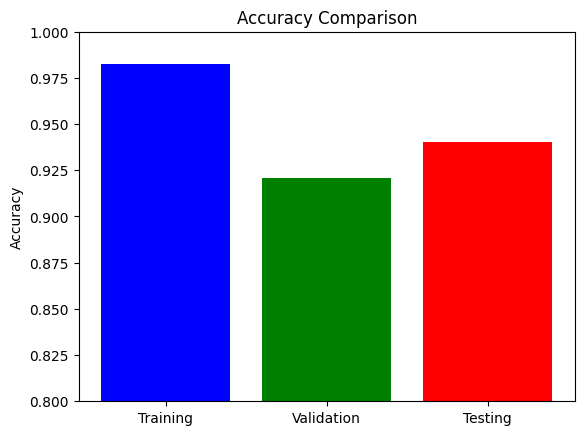

In [ ]:
import matplotlib.pyplot as plt

# Sample data
data = {'Training': 0.9825, 'Validation': 0.9207, 'Testing': 0.9402}

# Creating the bar chart
plt.bar(data.keys(), data.values(), color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)  # Adjust the y-axis range if necessary

# Show the plot
plt.show()

In [ ]:
# -- calculate R_sqaured for train, valid and test

# -- training

train_count_mean = train_count['GT_Count'].mean()
ssr = sum((train_count['GT_Count'] - train_count['Pred_Count'])**2)
sst = sum((train_count['GT_Count'] - train_count_mean)**2)
train_r2 = 1-(ssr/sst)

print(f'{(train_count_mean):.2f}')
print(f'The R_square of training is {(train_r2):.2f}')

# -- validation

valid_count_mean = valid_count['GT_Count'].mean()
ssr = sum((valid_count['GT_Count'] - valid_count['Pred_Count'])**2)
sst = sum((valid_count['GT_Count'] - valid_count_mean)**2)
valid_r2 = 1-(ssr/sst)

print(f'{(valid_count_mean):.2f}')
print(f'The R_square of validation is {(train_r2):.2f}')

# -- testing

test_count_mean = test_count['GT_Count'].mean()
ssr = sum((test_count['GT_Count'] - test_count['Pred_Count'])**2)
sst = sum((test_count['GT_Count'] - test_count_mean)**2)
test_r2 = 1-(ssr/sst)

print(f'{(test_count_mean):.2f}')
print(f'The R_square of testing is {(test_r2):.2f}')

544.59
The R_square of training is 0.98
531.04
The R_square of validation is 0.98
573.57
The R_square of testing is 0.91


In [ ]:
train_rmse = np.sqrt(((abs(train_count['GT_Count'] - train_count['Pred_Count']))**2).mean())
print(train_rmse)

41.75435870167611


In [ ]:
valid_rmse = np.sqrt(((abs(valid_count['GT_Count'] - valid_count['Pred_Count']))**2).mean())
print(valid_rmse)

49.58611306299025


In [ ]:
test_rmse = np.sqrt(((abs(test_count['GT_Count'] - test_count['Pred_Count']))**2).mean())
print(test_rmse)

94.00416272003943


In [ ]:
# -- Fit a regression line
slope, intercept = np.polyfit(train_count['GT_Count'], train_count['Pred_Count'], 1)
train_regression_line = slope * train_count['GT_Count'] + intercept
print(f'Training Regression Line: y = {slope:.2f}x+{intercept:.2f}')

Training Regression Line: y = 0.92x+30.86


In [ ]:
# -- Fit a regression line
slope, intercept = np.polyfit(valid_count['GT_Count'], valid_count['Pred_Count'], 1)
valid_regression_line = slope * valid_count['GT_Count'] + intercept
print(f'Validation Regression Line: y = {slope:.2f}x+({intercept:.2f})')

Validation Regression Line: y = 0.95x+(-4.28)


In [ ]:
# -- Fit a regression line
slope, intercept = np.polyfit(test_count['GT_Count'], test_count['Pred_Count'], 1)
test_regression_line = slope * test_count['GT_Count'] + intercept
print(f'Testing Regression Line: y = {slope:.2f}x+{intercept:.2f}')

Testing Regression Line: y = 0.80x+64.87


**Scatter Plots**

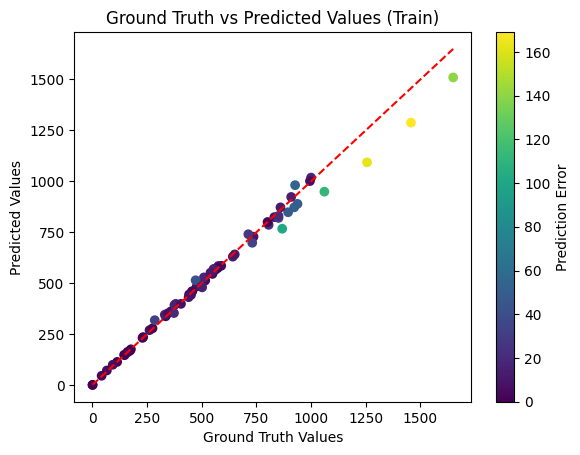

In [ ]:
# -- Training
train_count['error'] = abs(train_count['GT_Count'] - train_count['Pred_Count'])

# -- Plotting
plt.scatter(train_count['GT_Count'], train_count['Pred_Count'], c=train_count['error'], cmap='viridis')
plt.colorbar(label='Prediction Error')
plt.title('Ground Truth vs Predicted Values (Train)')
plt.xlabel('Ground Truth Values')
plt.ylabel('Predicted Values')

# -- Reference line for perfect predictions
plt.plot([train_count['GT_Count'].min(), train_count['GT_Count'].max()], [train_count['GT_Count'].min(), train_count['GT_Count'].max()], 'r--')
plt.show()

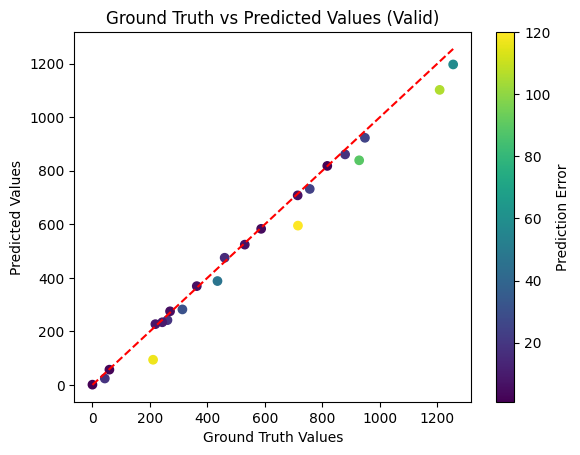

In [ ]:
# -- Validation
valid_count['error'] = abs(valid_count['GT_Count'] - valid_count['Pred_Count'])

# -- Plotting
plt.scatter(valid_count['GT_Count'], valid_count['Pred_Count'], c=valid_count['error'], cmap='viridis')
plt.colorbar(label='Prediction Error')
plt.title('Ground Truth vs Predicted Values (Valid)')
plt.xlabel('Ground Truth Values')
plt.ylabel('Predicted Values')

# -- Reference line for perfect predictions
plt.plot([valid_count['GT_Count'].min(), valid_count['GT_Count'].max()], [valid_count['GT_Count'].min(), valid_count['GT_Count'].max()], 'r--')

plt.show()

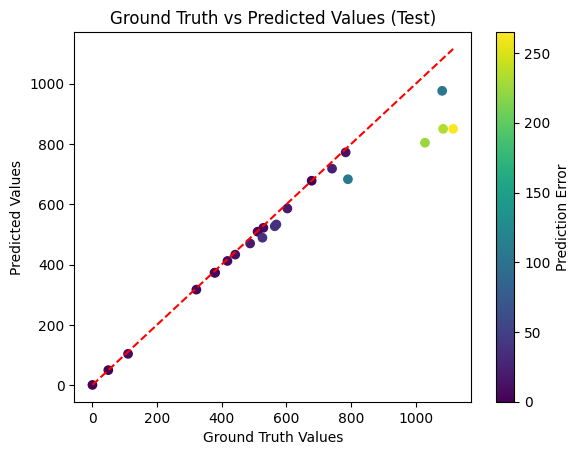

In [ ]:
# -- Testing
test_count['error'] = abs(test_count['GT_Count'] - test_count['Pred_Count'])

# -- Plotting
plt.scatter(test_count['GT_Count'], test_count['Pred_Count'], c=test_count['error'], cmap='viridis')
plt.colorbar(label='Prediction Error')
plt.title('Ground Truth vs Predicted Values (Test)')
plt.xlabel('Ground Truth Values')
plt.ylabel('Predicted Values')

# -- Reference line for perfect predictions
plt.plot([test_count['GT_Count'].min(), test_count['GT_Count'].max()], [test_count['GT_Count'].min(), test_count['GT_Count'].max()], 'r--')

plt.show()

In [ ]:
test_count

,Image_Name,Pred_Count,GT_Count,accuracy,error
0,20CHens_-1-,772,783,0.985951,11
1,21CHens_-1-,522,529,0.986767,7
2,21CHens,678,678,1.000000,0
3,22CCavs_-1-,509,511,0.996086,2
4,22CCavs,586,603,0.971808,17
5,4HHens_-1-,1,1,1.000000,0
6,5HHens_-1-,412,418,0.985646,6
7,5HHens,373,380,0.981579,7
8,6HHens_-1-,317,322,0.984472,5
9,6HHens,104,111,0.936937,7


Testing Regression Line: y = 0.92x+30.86


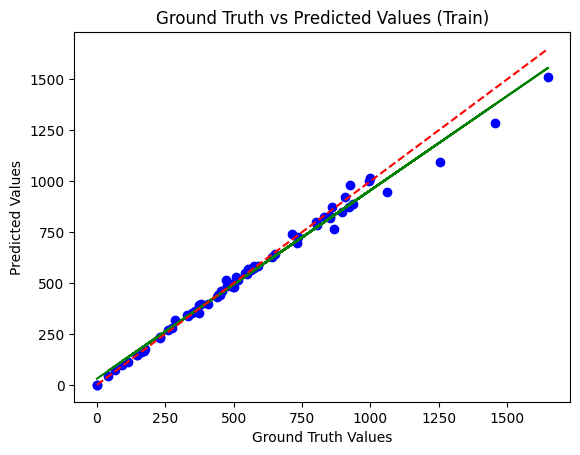

In [ ]:
# -- Fit a regression line
slope, intercept = np.polyfit(train_count['GT_Count'], train_count['Pred_Count'], 1)
train_regression_line = slope * train_count['GT_Count'] + intercept
print(f'Testing Regression Line: y = {slope:.2f}x+{intercept:.2f}')

# -- Plotting
plt.scatter(train_count['GT_Count'], train_count['Pred_Count'], label='Ground truth vs Predicted', c='blue')
plt.plot(train_count['GT_Count'], train_regression_line, color='green', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')

# -- Reference line for perfect predictions
plt.plot([train_count['GT_Count'].min(), train_count['GT_Count'].max()], [train_count['GT_Count'].min(), train_count['GT_Count'].max()], 'r--', label='Perfect Prediction Line')
plt.title('Ground Truth vs Predicted Values (Train)')
plt.xlabel('Ground Truth Values')
plt.ylabel('Predicted Values')
plt.show()

Testing Regression Line: y = 0.95x+-4.28


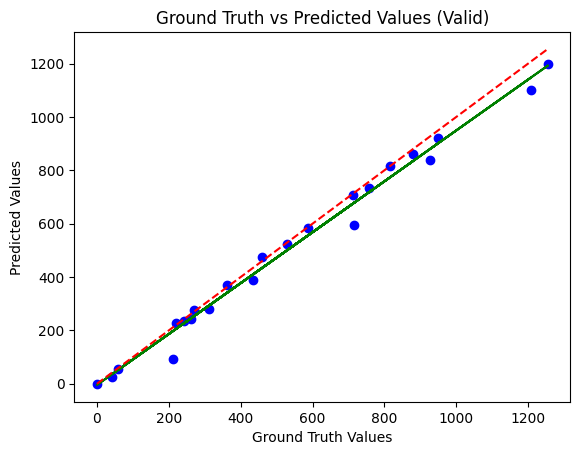

In [ ]:
# -- Fit a regression line
slope, intercept = np.polyfit(valid_count['GT_Count'], valid_count['Pred_Count'], 1)
valid_regression_line = slope * valid_count['GT_Count'] + intercept
print(f'Testing Regression Line: y = {slope:.2f}x+{intercept:.2f}')

# -- Plotting
plt.scatter(valid_count['GT_Count'], valid_count['Pred_Count'], label='Ground truth vs Predicted', c='blue')
plt.plot(valid_count['GT_Count'], valid_regression_line, color='green', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')

# -- Reference line for perfect predictions
plt.plot([valid_count['GT_Count'].min(), valid_count['GT_Count'].max()], [valid_count['GT_Count'].min(), valid_count['GT_Count'].max()], 'r--', label='Perfect Prediction Line')
plt.title('Ground Truth vs Predicted Values (Valid)')
plt.xlabel('Ground Truth Values')
plt.ylabel('Predicted Values')
plt.show()

Testing Regression Line: y = 0.80x+64.87


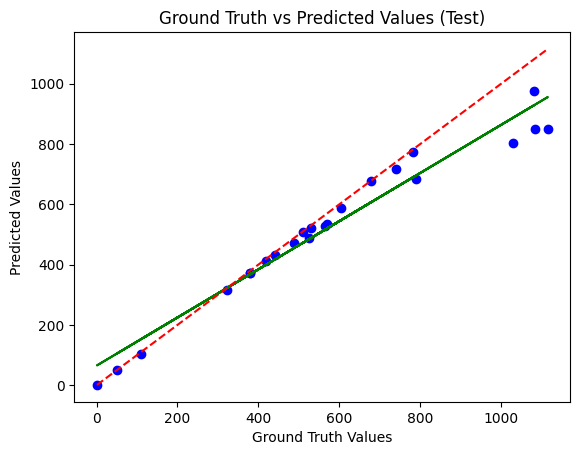

In [ ]:
# -- Fit a regression line
slope, intercept = np.polyfit(test_count['GT_Count'], test_count['Pred_Count'], 1)
test_regression_line = slope * test_count['GT_Count'] + intercept
print(f'Testing Regression Line: y = {slope:.2f}x+{intercept:.2f}')

# -- Plotting
plt.scatter(test_count['GT_Count'], test_count['Pred_Count'], label='Ground truth vs Predicted', c='blue')
plt.plot(test_count['GT_Count'], test_regression_line, color='green', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')

# -- Reference line for perfect predictions
plt.plot([test_count['GT_Count'].min(), test_count['GT_Count'].max()], [test_count['GT_Count'].min(), test_count['GT_Count'].max()], 'r--', label='Perfect Prediction Line')
plt.title('Ground Truth vs Predicted Values (Test)')
plt.xlabel('Ground Truth Values')
plt.ylabel('Predicted Values')
plt.show()

**Potential outliers**

In [ ]:
train_count[train_count['error']>=120]

,Image_Name,Pred_Count,GT_Count,accuracy,error
17,24CCavs,1510.0,1650,0.915152,140.0
30,3dropsquash022614,1288.0,1457,0.884008,169.0
53,P1030050,1093.0,1256,0.870223,163.0


In [ ]:
valid_count[valid_count['error']>=120]

,Image_Name,Pred_Count,GT_Count,accuracy,error
20,P1030210,595,715,0.832168,120


In [ ]:
test_count[test_count['error']>=120]

,Image_Name,Pred_Count,GT_Count,accuracy,error
19,P1030220,850,1115,0.762332,265
20,P1030226,850,1084,0.784133,234
21,P1030232,804,1028,0.782101,224


## Get the count of grains
**(By using the best weights of the trained model)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install ultralytics

!pip install ultralytics==8.0.196

import os
from PIL import Image
import pandas as pd
import numpy as np
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [3]:
# -- load the model
model = YOLO('/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_results/weights/best.pt')

In [4]:
# -- cropping the main image into 3x3 (9) cropped images
from PIL import Image
def crop_image_to_parts(image_path, num_rows, num_cols, save_path):
    # -- Load the image
    image = Image.open(image_path)
    img_width, img_height = image.size

    # -- Calculate the width and height of each cropped image
    crop_width = img_width // num_cols
    crop_height = img_height // num_rows

    # -- Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    # -- Crop the image into parts
    for i in range(num_rows):
        for j in range(num_cols):
            # -- Define the left, upper, right, and lower pixel coordinates
            left = j * crop_width
            upper = i * crop_height
            right = left + crop_width
            lower = upper + crop_height
            # -- Crop the image
            cropped_image = image.crop((left, upper, right, lower))
            # -- File path for cropped image
            original_file_name = os.path.splitext(os.path.basename(image_path))[0]
            cropped_file_path = os.path.join(save_path, f"{original_file_name}_{i*3+j+1}.jpg")
            # -- Save the cropped image
            cropped_image.save(cropped_file_path)

def process_images_in_directory(directory_path, save_path):
    # -- Get a list of all image files with different extensions in the directory
    image_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # -- Process each image
    for image_file in image_files:
        crop_image_to_parts(image_file, 3, 3, save_path)
        print(f"Processed {image_file}")

# -- detect the grains and returns the number of grains in the cropped images

def get_prediction_counts(image_directory):
    model = YOLO('/content/drive/MyDrive/Pollen_Grain_Counting_Project/Results/train_results/weights/best.pt')
    prediction_counts = {}

    # -- Iterate over each image in the directory
    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)

        # -- Make sure to process only image files (e.g., .jpg, .png)
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG', '.JPEG')):
            # Use the full path of the image for prediction
            result = model.predict(image_path, conf = 0.5, save=True, show_conf=True, show_labels=False)
            object_count = len(result[0].boxes)
            prediction_counts[image_name] = object_count

            print(prediction_counts)
            print()

    return prediction_counts

# -- adding the count of the cropped images and getting the final count for the main image

def aggregate_cropped_counts(cropped_counts):
    aggregated_counts = {}
    for cropped_image_name, count in cropped_counts.items():
        parts = cropped_image_name.split('_', 1)    # -- Splitting only at the first underscore
        original_image_name = parts[0]    # -- Using the part before the first underscore
        aggregated_counts[original_image_name] = aggregated_counts.get(original_image_name, 0) + count
    return aggregated_counts

In [5]:
# -- Process images

image_dir = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/'
cropped_images = '/content/cropped'

process_images_in_directory(image_dir, cropped_images)

Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/2dropsquash022614.jpg
Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/12HCels (1).JPG
Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/17C242s.JPG
Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/19CHens.JPG
Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/20CHens (1).JPG
Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/24CCavs.JPG
Processed /content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images/P1030204.JPG


In [6]:
# -- get count for all the cropped images

cropped_image_count = get_prediction_counts('/content/cropped')


image 1/1 /content/cropped/19CHens_7.jpg: 800x800 15 Grainss, 2173.2ms
Speed: 33.2ms preprocess, 2173.2ms inference, 46.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15}



image 1/1 /content/cropped/2dropsquash022614_2.jpg: 608x800 137 Grainss, 1368.5ms
Speed: 5.5ms preprocess, 1368.5ms inference, 2.7ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137}



image 1/1 /content/cropped/19CHens_5.jpg: 800x800 56 Grainss, 2078.3ms
Speed: 7.3ms preprocess, 2078.3ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56}



image 1/1 /content/cropped/17C242s_1.jpg: 800x800 2 Grainss, 1601.5ms
Speed: 7.4ms preprocess, 1601.5ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2}



image 1/1 /content/cropped/2dropsquash022614_6.jpg: 608x800 69 Grainss, 1666.1ms
Speed: 5.4ms preprocess, 1666.1ms inference, 7.4ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69}



image 1/1 /content/cropped/20CHens (1)_6.jpg: 800x800 280 Grainss, 3759.2ms
Speed: 22.5ms preprocess, 3759.2ms inference, 11.6ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280}



image 1/1 /content/cropped/P1030204_9.jpg: 608x800 16 Grainss, 1392.1ms
Speed: 13.5ms preprocess, 1392.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16}



image 1/1 /content/cropped/12HCels (1)_1.jpg: 800x800 (no detections), 2328.6ms
Speed: 7.4ms preprocess, 2328.6ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0}



image 1/1 /content/cropped/17C242s_3.jpg: 800x800 5 Grainss, 1669.6ms
Speed: 8.6ms preprocess, 1669.6ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5}



image 1/1 /content/cropped/20CHens (1)_3.jpg: 800x800 45 Grainss, 936.1ms
Speed: 5.5ms preprocess, 936.1ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45}



image 1/1 /content/cropped/12HCels (1)_9.jpg: 800x800 20 Grainss, 942.1ms
Speed: 5.6ms preprocess, 942.1ms inference, 4.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20}



image 1/1 /content/cropped/12HCels (1)_5.jpg: 800x800 84 Grainss, 981.0ms
Speed: 5.6ms preprocess, 981.0ms inference, 2.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84}



image 1/1 /content/cropped/12HCels (1)_2.jpg: 800x800 41 Grainss, 984.9ms
Speed: 5.9ms preprocess, 984.9ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41}



image 1/1 /content/cropped/24CCavs_5.jpg: 800x800 197 Grainss, 1400.9ms
Speed: 5.6ms preprocess, 1400.9ms inference, 3.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197}



image 1/1 /content/cropped/P1030204_2.jpg: 608x800 33 Grainss, 1100.3ms
Speed: 6.2ms preprocess, 1100.3ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33}



image 1/1 /content/cropped/20CHens (1)_7.jpg: 800x800 6 Grainss, 1299.4ms
Speed: 11.1ms preprocess, 1299.4ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6}



image 1/1 /content/cropped/P1030204_8.jpg: 608x800 98 Grainss, 721.0ms
Speed: 4.5ms preprocess, 721.0ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98}



image 1/1 /content/cropped/24CCavs_6.jpg: 800x800 223 Grainss, 946.0ms
Speed: 5.5ms preprocess, 946.0ms inference, 7.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223}



image 1/1 /content/cropped/12HCels (1)_6.jpg: 800x800 38 Grainss, 927.8ms
Speed: 5.7ms preprocess, 927.8ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38}



image 1/1 /content/cropped/2dropsquash022614_7.jpg: 608x800 139 Grainss, 733.5ms
Speed: 5.7ms preprocess, 733.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139}



image 1/1 /content/cropped/19CHens_4.jpg: 800x800 100 Grainss, 943.8ms
Speed: 5.5ms preprocess, 943.8ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100}



image 1/1 /content/cropped/17C242s_8.jpg: 800x800 76 Grainss, 949.1ms
Speed: 5.6ms preprocess, 949.1ms inference, 4.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76}



image 1/1 /content/cropped/P1030204_5.jpg: 608x800 243 Grainss, 746.9ms
Speed: 4.8ms preprocess, 746.9ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243}



image 1/1 /content/cropped/20CHens (1)_8.jpg: 800x800 60 Grainss, 938.4ms
Speed: 5.4ms preprocess, 938.4ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60}



image 1/1 /content/cropped/20CHens (1)_2.jpg: 800x800 97 Grainss, 955.4ms
Speed: 5.5ms preprocess, 955.4ms inference, 5.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97}



image 1/1 /content/cropped/17C242s_6.jpg: 800x800 71 Grainss, 965.4ms
Speed: 5.6ms preprocess, 965.4ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71}



image 1/1 /content/cropped/P1030204_4.jpg: 608x800 53 Grainss, 1041.8ms
Speed: 4.9ms preprocess, 1041.8ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53}



image 1/1 /content/cropped/19CHens_9.jpg: 800x800 13 Grainss, 1439.1ms
Speed: 7.4ms preprocess, 1439.1ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13}



image 1/1 /content/cropped/2dropsquash022614_3.jpg: 608x800 19 Grainss, 1114.2ms
Speed: 8.4ms preprocess, 1114.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19}



image 1/1 /content/cropped/19CHens_1.jpg: 800x800 127 Grainss, 955.1ms
Speed: 11.2ms preprocess, 955.1ms inference, 3.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127}



image 1/1 /content/cropped/17C242s_4.jpg: 800x800 46 Grainss, 935.0ms
Speed: 7.7ms preprocess, 935.0ms inference, 3.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46}



image 1/1 /content/cropped/24CCavs_7.jpg: 800x800 50 Grainss, 951.8ms
Speed: 5.6ms preprocess, 951.8ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50}



image 1/1 /content/cropped/P1030204_3.jpg: 608x800 3 Grainss, 728.4ms
Speed: 4.6ms preprocess, 728.4ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3}



image 1/1 /content/cropped/19CHens_2.jpg: 800x800 143 Grainss, 950.3ms
Speed: 5.7ms preprocess, 950.3ms inference, 2.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143}



image 1/1 /content/cropped/2dropsquash022614_1.jpg: 608x800 31 Grainss, 731.2ms
Speed: 6.0ms preprocess, 731.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31}



image 1/1 /content/cropped/24CCavs_8.jpg: 800x800 300 Grainss, 933.1ms
Speed: 5.7ms preprocess, 933.1ms inference, 6.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300}



image 1/1 /content/cropped/24CCavs_2.jpg: 800x800 300 Grainss, 941.4ms
Speed: 6.7ms preprocess, 941.4ms inference, 9.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300}



image 1/1 /content/cropped/20CHens (1)_9.jpg: 800x800 11 Grainss, 946.8ms
Speed: 5.4ms preprocess, 946.8ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11}



image 1/1 /content/cropped/P1030204_7.jpg: 608x800 18 Grainss, 733.7ms
Speed: 4.8ms preprocess, 733.7ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18}



image 1/1 /content/cropped/P1030204_6.jpg: 608x800 11 Grainss, 746.6ms
Speed: 4.6ms preprocess, 746.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11}



image 1/1 /content/cropped/19CHens_6.jpg: 800x800 40 Grainss, 1463.5ms
Speed: 7.4ms preprocess, 1463.5ms inference, 1.9ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40}



image 1/1 /content/cropped/P1030204_1.jpg: 608x800 2 Grainss, 1103.8ms
Speed: 6.4ms preprocess, 1103.8ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2}



image 1/1 /content/cropped/24CCavs_3.jpg: 800x800 92 Grainss, 1195.1ms
Speed: 9.1ms preprocess, 1195.1ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/2dropsquash022614_5.jpg: 608x800 247 Grainss, 717.9ms
Speed: 4.0ms preprocess, 717.9ms inference, 3.1ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/20CHens (1)_1.jpg: 800x800 52 Grainss, 944.2ms
Speed: 7.1ms preprocess, 944.2ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/19CHens_8.jpg: 800x800 73 Grainss, 939.7ms
Speed: 6.7ms preprocess, 939.7ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/17C242s_5.jpg: 800x800 70 Grainss, 939.6ms
Speed: 6.3ms preprocess, 939.6ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/12HCels (1)_7.jpg: 800x800 5 Grainss, 940.6ms
Speed: 8.3ms preprocess, 940.6ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/12HCels (1)_8.jpg: 800x800 25 Grainss, 976.6ms
Speed: 6.4ms preprocess, 976.6ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/24CCavs_9.jpg: 800x800 36 Grainss, 997.2ms
Speed: 7.5ms preprocess, 997.2ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/17C242s_7.jpg: 800x800 141 Grainss, 946.1ms
Speed: 5.6ms preprocess, 946.1ms inference, 2.1ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/24CCavs_4.jpg: 800x800 255 Grainss, 940.8ms
Speed: 5.5ms preprocess, 940.8ms inference, 3.8ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/12HCels (1)_4.jpg: 800x800 14 Grainss, 1115.4ms
Speed: 8.6ms preprocess, 1115.4ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/17C242s_2.jpg: 800x800 16 Grainss, 1484.0ms
Speed: 7.6ms preprocess, 1484.0ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/24CCavs_1.jpg: 800x800 57 Grainss, 1472.5ms
Speed: 7.5ms preprocess, 1472.5ms inference, 4.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/2dropsquash022614_4.jpg: 608x800 251 Grainss, 745.6ms
Speed: 5.2ms preprocess, 745.6ms inference, 5.6ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/17C242s_9.jpg: 800x800 32 Grainss, 930.1ms
Speed: 5.5ms preprocess, 930.1ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/20CHens (1)_5.jpg: 800x800 182 Grainss, 951.5ms
Speed: 7.7ms preprocess, 951.5ms inference, 2.6ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/20CHens (1)_4.jpg: 800x800 39 Grainss, 943.6ms
Speed: 7.5ms preprocess, 943.6ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/12HCels (1)_3.jpg: 800x800 7 Grainss, 943.2ms
Speed: 7.7ms preprocess, 943.2ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/19CHens_3.jpg: 800x800 15 Grainss, 960.0ms
Speed: 5.6ms preprocess, 960.0ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/2dropsquash022614_9.jpg: 608x800 7 Grainss, 739.0ms
Speed: 5.4ms preprocess, 739.0ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict



{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

image 1/1 /content/cropped/2dropsquash022614_8.jpg: 608x800 300 Grainss, 715.5ms
Speed: 6.5ms preprocess, 715.5ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict


{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CCavs_

In [7]:
print(len(cropped_image_count))
print()
print(cropped_image_count)
print()

# -- get the main image count of pollen grains (adding the cropped images count)

main_image_count = aggregate_cropped_counts(cropped_image_count)
print(main_image_count)
print()
print(len(main_image_count))

63

{'19CHens_7.jpg': 15, '2dropsquash022614_2.jpg': 137, '19CHens_5.jpg': 56, '17C242s_1.jpg': 2, '2dropsquash022614_6.jpg': 69, '20CHens (1)_6.jpg': 280, 'P1030204_9.jpg': 16, '12HCels (1)_1.jpg': 0, '17C242s_3.jpg': 5, '20CHens (1)_3.jpg': 45, '12HCels (1)_9.jpg': 20, '12HCels (1)_5.jpg': 84, '12HCels (1)_2.jpg': 41, '24CCavs_5.jpg': 197, 'P1030204_2.jpg': 33, '20CHens (1)_7.jpg': 6, 'P1030204_8.jpg': 98, '24CCavs_6.jpg': 223, '12HCels (1)_6.jpg': 38, '2dropsquash022614_7.jpg': 139, '19CHens_4.jpg': 100, '17C242s_8.jpg': 76, 'P1030204_5.jpg': 243, '20CHens (1)_8.jpg': 60, '20CHens (1)_2.jpg': 97, '17C242s_6.jpg': 71, 'P1030204_4.jpg': 53, '19CHens_9.jpg': 13, '2dropsquash022614_3.jpg': 19, '19CHens_1.jpg': 127, '17C242s_4.jpg': 46, '24CCavs_7.jpg': 50, 'P1030204_3.jpg': 3, '19CHens_2.jpg': 143, '2dropsquash022614_1.jpg': 31, '24CCavs_8.jpg': 300, '24CCavs_2.jpg': 300, '20CHens (1)_9.jpg': 11, 'P1030204_7.jpg': 18, 'P1030204_6.jpg': 11, '19CHens_6.jpg': 40, 'P1030204_1.jpg': 2, '24CC

## Pollen Grain count for the images

In [8]:
# -- convert list into a dataframe and saving it into drive

Grain_Counts = pd.DataFrame(list(main_image_count.items()), columns=['Image_Name', 'Grain_Count'])
Grain_Counts = Grain_Counts.sort_values(by='Grain_Count', ascending=False)

from datetime import datetime
import pytz

# Set your time zone, for example, 'America/New_York'
time_zone = pytz.timezone('America/New_York')
current_time = datetime.now(time_zone)
formatted_time = current_time.strftime("%Y-%m-%d_%H-%M-%S")
file_path = f'/content/drive/MyDrive/Pollen_Grain_Counting_Project/New_Results/{formatted_time}.csv'
Grain_Counts.to_csv(file_path, index=False)

import shutil
source_dir = f'/content/runs/detect/predict/'
dest_dir = f'/content/drive/MyDrive/Pollen_Grain_Counting_Project/New_Results/{formatted_time}/'
shutil.copytree(source_dir, dest_dir)

'/content/drive/MyDrive/Pollen_Grain_Counting_Project/New_Results/2024-01-26_10-15-31/'

In [9]:
Grain_Counts

,Image_Name,Grain_Count
6,24CCavs,1510
1,2dropsquash022614,1200
3,20CHens (1),772
0,19CHens,582
4,P1030204,477
2,17C242s,459
5,12HCels (1),234


## Delete the images that were uploaded in the drive

In [ ]:
# -- delete the images from drive that are used to get the count,
# -- so that it would become easy for the next time while doing it for the new images.

import os

# Specify the directory
folder_path = '/content/drive/MyDrive/Pollen_Grain_Counting_Project/new_images'

# Check if the directory exists
if os.path.exists(folder_path):
    # Iterate over all files in the directory
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        # Check if it's a file and not a sub-directory
        if os.path.isfile(file_path):
            os.remove(file_path)  # Delete the file
            print(f"Deleted {file_path}")
    print(f'Deleted all images')
else:
    print("Folder not found")

# Specify the path to your folder
cropped_images_path = '/content/cropped'

# List all files in the folder
files_in_folder = os.listdir(cropped_images_path)

# Loop through all the files
for file_name in files_in_folder:
    # Construct the full file path
    file_path = os.path.join(cropped_images_path, file_name)
    os.remove(file_path)
print(f"Deleted images in {cropped_images_path}")